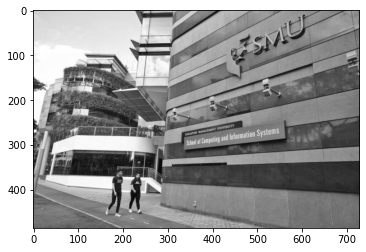

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import convolve
from skimage import io
from skimage.color import rgb2gray


img = io.imread('../data/scis1.jpeg')
img = rgb2gray(img)

plt.imshow(img, cmap='gray')
plt.show()

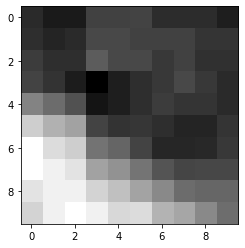

In [4]:
patch = img[5:15,5:15]
plt.imshow(patch, cmap='gray')
plt.show()

# Harris Response

In [5]:
Ix2_bar = 1.
Iy2_bar = 1
Ixy_bar = 1
Mbar = np.array([
    [Ix2_bar, Ixy_bar],
    [Ixy_bar, Iy2_bar]
])
Mbar

array([[1., 1.],
       [1., 1.]])

In [6]:
lam, _ = np.linalg.eig(Mbar)
print(f"Eigen values: {lam[0]:0.2f}, {lam[1]:0.2f}")

Eigen values: 2.00, 0.00


In [7]:
detMbar = np.linalg.det(Mbar)
trMbar = np.trace(Mbar)
kappa = 0.04
# coef = detMbar - kappa * trMbar ** 2
coef = detMbar / (trMbar ** 2)
print(f"det(Mbar): {detMbar:0.2f}, tr(Mbar): {trMbar:0.2f}, coef: {coef:0.2f}")

det(Mbar): 0.00, tr(Mbar): 2.00, coef: 0.00


In [8]:
Ix2_bar = 10
Iy2_bar = 9
Ixy_bars = np.linspace(0, 9, 100)

Mbars = []
coefs = []
for Ixy_bar in Ixy_bars:
    Mbar = np.array([
        [Ix2_bar, Ixy_bar],
        [Ixy_bar, Iy2_bar]
    ])
    lam, _ = np.linalg.eig(Mbar)

    detMbar = np.linalg.det(Mbar)
    trMbar = np.trace(Mbar)
    kappa = 0.04
    #coef = detMbar - kappa * trMbar ** 2
    coef = detMbar / trMbar ** 2
    coefs.append(coef)
coefs = np.array(coefs)

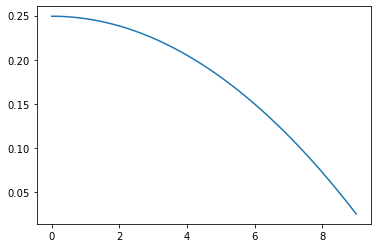

In [9]:
plt.plot(Ixy_bars, coefs)
plt.show()

In [10]:
from scipy import ndimage as ndi


def compute_harris_response(im, sigma=3):
    imx = ndi.gaussian_filter(im, sigma, (0, 1))
    imy = ndi.gaussian_filter(im, sigma, (1, 0))

    Ix2 = ndi.gaussian_filter(imx * imx, sigma)
    Iy2 = ndi.gaussian_filter(imy * imy, sigma)
    Ixy = ndi.gaussian_filter(imx * imy, sigma)

    Mbar_det = Ix2 * Iy2 - Ixy**2
    Mbar_tr = Ix2 + Iy2

    return Mbar_det / Mbar_tr

In [11]:
harris_response = compute_harris_response(img)

In [12]:
from skimage.feature import corner_harris, corner_subpix, corner_peaks
coords = corner_peaks(corner_harris(img), min_distance=5, threshold_rel=0.02)
coords_subpix = corner_subpix(img, coords, window_size=13)

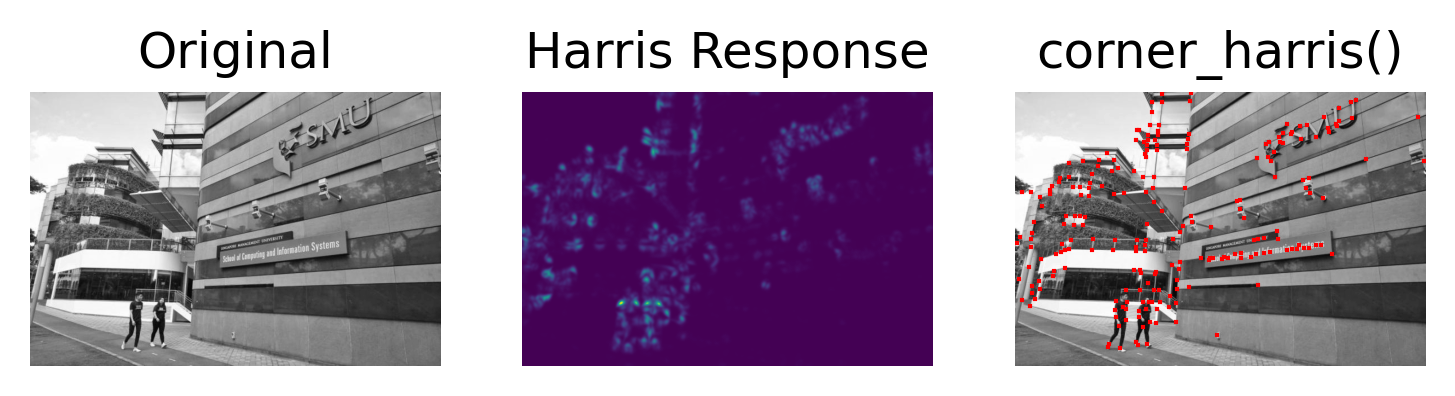

In [13]:
fig, axs = plt.subplots(1, 3)
fig.set_dpi(300)

axs[0].imshow(img, cmap='gray')
axs[1].imshow(harris_response)

axs[2].imshow(img, cmap='gray')
axs[2].plot(coords_subpix[:, 1], coords_subpix[:, 0], '+r', markersize=1)

axs[0].axis('off')
axs[1].axis('off')
axs[2].axis('off')

axs[0].set_title('Original')
axs[1].set_title('Harris Response')
axs[2].set_title('corner_harris()')
plt.show()